# VGG-16 Architecture Implementation

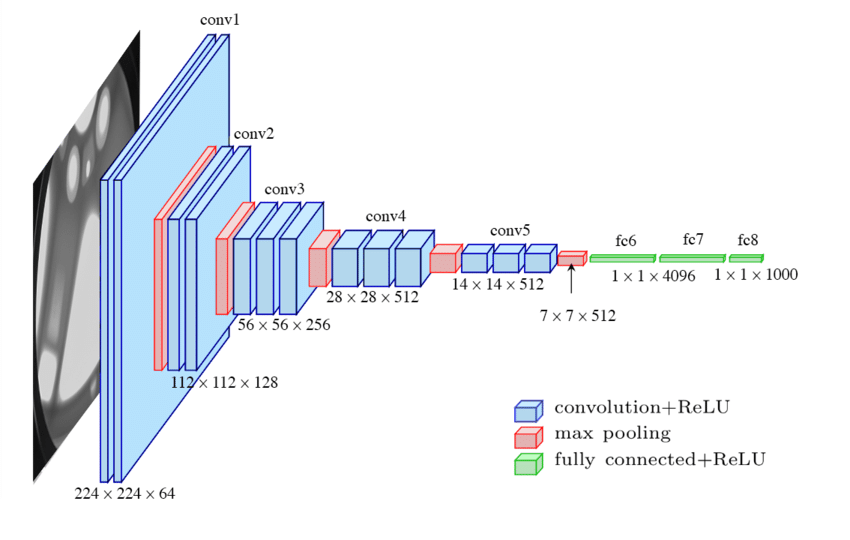

In [23]:
import torch 
import torch.nn as nn 
import torch.optim as optim 
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms 
from torch.utils.data import DataLoader

In [28]:
# Summarized Architecture of VGG
# M : Maxpool 

VGG_arch_types = {
    "VGG11": [64, "M", 128, "M", 256, 256, "M", 512, 512, "M", 512, 512, "M"],
    "VGG13": [64, 64, "M", 128, 128, "M", 256, 256, "M", 512, 512, "M", 512, 512, "M"],
    "VGG16": [64,64,"M",128,128,"M",256,256,256,"M",512,512,512,"M",512,512,512,"M",],
    "VGG19": [64,64,"M",128,128,"M",256,256,256,256,
              "M",512,512,512,512,"M",512,512,512,512,"M",],
}
# After this flatten and linear layers

In [40]:
class VGG_net(nn.Module):
  def __init__(self,in_channels=3,num_classes=1000):
    super(VGG_net,self).__init__()
    self.in_channels = in_channels
    self.conv_layers = self.create_conv_layers(VGG_arch_types["VGG16"])
    self.fcs = nn.Sequential(
        nn.Linear(512*7*7,4096),
        nn.ReLU(),
        nn.Dropout(p=0.5),
        nn.Linear(4096,4096),
        nn.ReLU(),
        nn.Dropout(p=0.5),
        nn.Linear(4096,num_classes)
    )

  def forward(self,x):
    x = self.conv_layers(x)
    x = x.reshape(x.shape[0],-1)
    x = self.fcs(x)
    return x

  def create_conv_layers(self,architecture):
    layers = []
    in_channels = self.in_channels
    for x in architecture:
      if type(x)==int:
        out_channels = x
        layers+=[nn.Conv2d(in_channels=in_channels,
                           out_channels=out_channels,
                           kernel_size=(3,3),stride=(1,1),
                           padding=(1,1)),
                 nn.BatchNorm2d(x),
                 nn.ReLU()]
        # Update the in_channels for next
        in_channels = x
      elif x=="M":
        layers+=[nn.MaxPool2d(kernel_size=(2,2),stride=(2,2))]
    
    return nn.Sequential(*layers)


In [41]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = VGG_net(3,1000).to(device)
x = torch.randn(1,3,224,224).cuda()
print(model(x).shape)

torch.Size([1, 1000])
